In [1]:
import numpy
import pandas as pd
import scipy
import sklearn
import autograd.numpy as np
from autograd import grad
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Question 1
*Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and why are predictor variables 4 and 5 probably not very useful by themselves to predict median house values in a block?*

In [2]:
# Load the data
df = pd.read_csv('housingUnits.csv')
median_house_value = df['median_house_value'] # outcome variable
housing_median_age = df['housing_median_age'] # predictor 1
total_rooms = df['total_rooms'] # predictor 2
total_bedrooms = df['total_bedrooms'] # predictor 3
population = df['population'] # predictor 4
households = df['households'] # predictor 5
median_income = df['median_income'] # predictor 6
ocean_proximity = df['ocean_proximity'] # predictor 7

print('Descriptive Statistics of total_rooms')
print(total_rooms.describe())
print('\nDescriptive Statistics of total_bedrooms')
print(total_bedrooms.describe())
print()

model_1 = LinearRegression().fit(population.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_1 = model_1.score(population.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))
print('{:47s}{:.4f}'.format('r^2 between population and median_house_value: ', rSqr_1))

model_2 = LinearRegression().fit(households.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_2 = model_2.score(households.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))
print('{:47s}{:.4f}'.format('r^2 between households and median_house_value: ', rSqr_2))


Descriptive Statistics of total_rooms
count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

Descriptive Statistics of total_bedrooms
count    20640.000000
mean       537.735271
std        391.392913
min         65.000000
25%        324.750000
50%        446.000000
75%        630.000000
max       7119.000000
Name: total_bedrooms, dtype: float64

r^2 between population and median_house_value: 0.0006
r^2 between households and median_house_value: 0.0043


* In the code, I first load the data. Then, I find the descriptive data of predictor 2 and 3. Then, I maked the linear regression mode of predictor 4 with outcome variable and predictor 5 with outcome variable to find the correlation coefficient.
* To determine if normalization/standardization is necessary, we need to know if data are on the similar scale. In the real life, blocks are not necessarily the same size, and in the data, census could also cause some problems of miscalculations as well. If the blocks are not the same size in our data, we cannot directly use the total number of rooms and the total number of the bedrooms as predictors, since the data of them will not be on the same scale. Standardization will make the data on the same scale (unitless sizes of each house). Secondly, to determine if predictor variables are useful to make the prediction, we need to know if they are correlated with outcome predictor, which is what I did in the code (calculating the coefficient of determination).
* The correlation of determination (r^2) of predictor 2 and outcome variable and the correlation of determination (r^2) of predictor 3 and outcome variable are 0.0006 and 0.0043.
* It is necessary to do the normalization/standardization, because variable are on the different scales. The finding tells us predictor 4 and outcome variable and predictor 5 and outcome variable are not very correlated. It is not a good choice to use these predictors.

# Question 2
*To meaningfully use predictor variables 2 (number of rooms) and 3 (number of bedrooms), you will need to standardize/normalize them. Using the data, is it better to normalize them by population (4) or number of households (5)?*

In [8]:
total_rooms_by_population = total_rooms/population
model_1 = LinearRegression().fit(total_rooms_by_population.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_1 = model_1.score(total_rooms_by_population.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

total_rooms_by_households = total_rooms/households
model_2 = LinearRegression().fit(total_rooms_by_households.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_2 = model_2.score(total_rooms_by_households.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

total_bedrooms_by_population = total_bedrooms/population
model_3 = LinearRegression().fit(total_bedrooms_by_population.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_3 = model_3.score(total_bedrooms_by_population.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

total_bedrooms_by_households = total_bedrooms/households
model_4 = LinearRegression().fit(total_bedrooms_by_households.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_4 = model_4.score(total_bedrooms_by_households.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

print('{:78s}{:.4f}'.format('r^2 between total_rooms stardardized by population and median_house_value: ', rSqr_1))
print('{:78s}{:.4f}'.format('r^2 between total_rooms stardardized by households and median_house_value: ', rSqr_2))
print('{:78s}{:.4f}'.format('r^2 between total_bedrooms stardardized by population and median_house_value: ', rSqr_3))
print('{:78s}{:.4f}'.format('r^2 between total_bedrooms stardardized by households and median_house_value: ', rSqr_4))

r^2 between total_rooms stardardized by population and median_house_value:    0.0439
r^2 between total_rooms stardardized by households and median_house_value:    0.0231
r^2 between total_bedrooms stardardized by population and median_house_value: 0.0128
r^2 between total_bedrooms stardardized by households and median_house_value: 0.0034


* In the code, I divide the array of total rooms and the array of total bedrooms by population and the number of households, which is the process of standardization. Then, I use the standardized result with outcome variable to find the correlation of determination.
* Ideally, we need to divide the number of rooms in the block by the number of houses in the block to have an average rooms per house in the block, but we do not have the data of the number of houses in each blocks, so we have to use population or household to get an approximate data. We need to find which predictor works better. Intuitively, comparing to population, the number of households is a concept closer to the number of houses. Because how many households in a block sounds more like how many houses are in the block. But standardized by households not necessarily will make the model more fitted. We need to check the correlation of determination to make the conclusion. 
* For total rooms vs outcome and total bedrooms vs outcome, standardized by population, the correlation of determination is 0.0439 and 0.0128; standardized by households, the correlation of determination is 0.0231 and 0.0034.
* Number of rooms divided by population sounds like rooms per people. Comparing to be divided by households, which generates the result rooms per household, divided by population is not that meaningful. Even though standardized by population tends to have a higher correlation of determination, **I insist to normalize predictor 2 and predictor 3 by households**.

# Question 3
*Which of the seven variables is most and least predictive of housing value, from a simple linear regression perspective? [Hints: a) Make sure to use the standardized/normalized variables from 2. above; b) Make sure to inspect the scatter plots and comment on a potential issue – would the best predictor be even more predictive if not for an unfortunate limitation of the data?]*

r^2 of housing_median_age and median_house_value:            0.0112
r^2 of total_rooms (stardardized) and median_house_value:    0.0231
r^2 of total_bedrooms (stardardized) and median_house_value: 0.0034
r^2 of population and median_house_value:                    0.0006
r^2 of households and median_house_value:                    0.0043
r^2 of median_income and median_house_value:                 0.4734
r^2 of ocean_proximity and median_house_value:               0.1578
r^2 of median_income (modified) and median_house_value:      0.4129


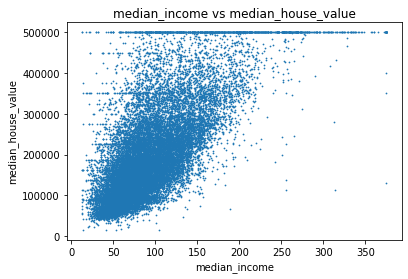

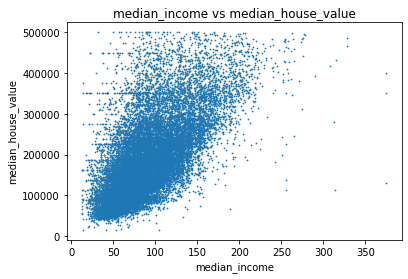

In [9]:
model_1 = LinearRegression().fit(housing_median_age.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_1 = model_1.score(housing_median_age.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

total_rooms_by_households = total_rooms/households
model_2 = LinearRegression().fit(total_rooms_by_households.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_2 = model_2.score(total_rooms_by_households.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

total_bedrooms_by_households = total_bedrooms/households
model_3 = LinearRegression().fit(total_bedrooms_by_households.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_3 = model_3.score(total_bedrooms_by_households.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

model_4 = LinearRegression().fit(population.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_4 = model_4.score(population.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

model_5 = LinearRegression().fit(households.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_5 = model_5.score(households.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

model_6 = LinearRegression().fit(median_income.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_6 = model_6.score(median_income.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

model_7 = LinearRegression().fit(ocean_proximity.to_numpy().reshape(-1, 1), median_house_value.to_numpy().reshape(-1, 1))
rSqr_7 = model_7.score(ocean_proximity.to_numpy().reshape(-1,1), median_house_value.to_numpy().reshape(-1,1))

print('{:61s}{:.4f}'.format('r^2 of housing_median_age and median_house_value: ', rSqr_1))
print('{:61s}{:.4f}'.format('r^2 of total_rooms (stardardized) and median_house_value: ', rSqr_2))
print('{:61s}{:.4f}'.format('r^2 of total_bedrooms (stardardized) and median_house_value: ', rSqr_3))
print('{:61s}{:.4f}'.format('r^2 of population and median_house_value: ', rSqr_4))
print('{:61s}{:.4f}'.format('r^2 of households and median_house_value: ', rSqr_5))
print('{:61s}{:.4f}'.format('r^2 of median_income and median_house_value: ', rSqr_6))
print('{:61s}{:.4f}'.format('r^2 of ocean_proximity and median_house_value: ', rSqr_7))
plt.figure(0)
plt.plot(median_income, median_house_value, 'o', markersize=.75)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('median_income vs median_house_value')

median_house_value_TF = median_house_value <= 500000
new_median_house_value = median_house_value[median_house_value_TF]
new_median_income = median_income[median_house_value_TF]
model_8 = LinearRegression().fit(new_median_income.to_numpy().reshape(-1, 1), new_median_house_value.to_numpy().reshape(-1, 1))
rSqr_8 = model_8.score(new_median_income.to_numpy().reshape(-1,1), new_median_house_value.to_numpy().reshape(-1,1))

plt.figure(1)
plt.plot(new_median_income, new_median_house_value, 'o', markersize=.75)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('median_income vs median_house_value')
print('{:61s}{:.4f}'.format('r^2 of median_income (modified) and median_house_value: ', rSqr_8))

* In the code, I make the linear regression model seven times using seven different predictors. Then examine the scatter plot of the best predictor to determine if the data limination negatively influnce the model.
* I am doing the linear regression models seven times using seven different predictors because I need to compare the the correlation of determination in different models so that I could tell which predictor makes the fittest model. Then by examining the scatter plot, I can check out the potential issues.
* By comparing the r^2 (correlation of determinantion), I can tell the model using median_income predictor makes the fittest model. Then I examine the scatter plot between median_income vs median_house_value and find that there are a lot of data with different median_income but the same median_house_value (500001). The data points are too many to be a coincidence that all these houses have the same median_house_value. I believe this happens due to the method used during data cleaning, so I simply get rid of these points with median_house_value 500001 and calculate the correlation of determination.
* A higher r^2 suggests a stronger fitted model. By comparing the r^2 between models using seven different predictors, we can tell the median_income predictor makes the fittest model. But by removing the limitation of data, the r^2 does not go up, which means the model does not fitter better than without removing the limitation of data. However, I still believe this will make the model more predictive, as the noise might make the model stronger correlated but less predictive.

# Question 4
*Putting all predictors together in a multiple regression model – how well do these predictors taken together predict housing value? How does this full model compare to the model that just has the single best predictor from 3.?*

In [10]:
df['total_rooms_by_households'] = total_rooms_by_households
df['total_bedrooms_by_households'] = total_bedrooms_by_households
X = df[['housing_median_age', 'total_rooms_by_households', 'total_bedrooms_by_households', 'population', 'households', 'median_income', 'ocean_proximity']]
model_together = LinearRegression().fit(X, median_house_value.to_numpy().reshape(-1,1))
rSqr_together = model_together.score(X, median_house_value.to_numpy().reshape(-1,1))
print('{:40s}{:.4f}'.format('r^2 of the multiple regression model is: ', rSqr_together))

r^2 of the multiple regression model is: 0.5992


* In the code I use multiple regression model and calculate the correlation of determination.
* I am doing so because the correlation of determination could tell how strong the model fit.
* The the correlation of determination of the multiple regression model is 0.5992, which is greater than the correlation of determination of the single best predictor from 3.
* Since a greater correlation of determination indicates a stronger relationship between variables. We can say this full model fits better than the previous best predictor model from 3.

# Question 5
*Considering the relationship between the (standardized) variables 2 and 3, is there potentially a concern regarding collinearity? Is there a similar concern regarding variables 4 and 5, if you were to include them in the model?*

In [11]:
model_2_3 = LinearRegression().fit(total_rooms_by_population.to_numpy().reshape(-1,1), total_bedrooms_by_population.to_numpy().reshape(-1,1))
rSqr_2_3 = model_2_3.score(total_rooms_by_population.to_numpy().reshape(-1,1), total_bedrooms_by_population.to_numpy().reshape(-1,1))
print('The correlation coefficient between predictor 2 and predictor 3 is: ' + str(np.sqrt(rSqr_2_3)))

model_4_5 = LinearRegression().fit(population.to_numpy().reshape(-1,1), households.to_numpy().reshape(-1,1))
rSqr_4_5 = model_4_5.score(population.to_numpy().reshape(-1,1), households.to_numpy().reshape(-1,1))
print('The correlation coefficient between predictor 4 and predictor 5 is: ' + str(np.sqrt(rSqr_4_5)))

The correlation coefficient between predictor 2 and predictor 3 is: 0.6414637002481955
The correlation coefficient between predictor 4 and predictor 5 is: 0.9072222660959617


* I use linear regression model to find out the correlation coefficient between variable 2 and 3 and between variable 4 and 5.
* I am doing so because by calculating the correlation coefficient, we could tell how strong the predictor variables are correlated, which indicates whether there is a collinearity.
* The correlation coefficient between variable 2 and 3 is 0.5187. The correlation coefficient bewteen variable 4 and 5 is 0.9072.
* The correlation coefficient between variable 2 and 3 is less than 0.7, which does not indicate a presence of collinearity (or not that serious). The correlation coefficient between variable 4 and 5 is greater than 0.7, which indicates a presence of collinearity. 

# Extra 1

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64
count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64
count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64
count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: total_rooms_by_households, dtype: float64
count    20640.000000
mean       537.735271
std        391.392913
min         65.000000
25%        324.750000
50%        446

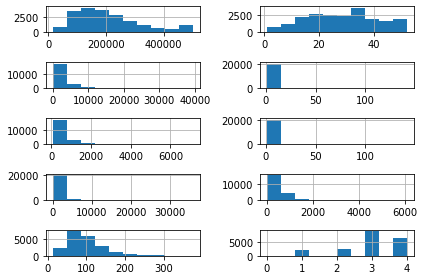

In [7]:
print(median_house_value.describe())
print(housing_median_age.describe())
print(total_rooms.describe())
print(df['total_rooms_by_households'].describe())
print(total_bedrooms.describe())
print(df['total_bedrooms_by_households'].describe())
print(population.describe())
print(households.describe())
print(median_income.describe())
print(ocean_proximity.describe())

# median_house_value
plt.subplot(5, 2, 1)
median_house_value.hist()
# housing_median_age
plt.subplot(5, 2, 2)
housing_median_age.hist()
# total_rooms
plt.subplot(5, 2, 3)
total_rooms.hist()
# total_rooms_by_households
plt.subplot(5, 2, 4)
df['total_rooms_by_households'].hist()
# total_bedrooms
plt.subplot(5, 2, 5)
total_bedrooms.hist()
# total_bedrooms_by_households
plt.subplot(5, 2, 6)
total_rooms_by_households.hist()
# population
plt.subplot(5, 2, 7)
population.hist()
# households
plt.subplot(5, 2, 8)
households.hist()
# median_income
plt.subplot(5, 2, 9)
median_income.hist()
# ocean_proximity
plt.subplot(5, 2, 10)
ocean_proximity.hist()
plt.tight_layout()
plt.show()

* In the code, I plot out the histogram of each predictors/outcome and find the descriptive statistics of data.
* I am doing so because the shape of histogram could tell if the distribution is normal or not, this is visual check. But visual check is not enough. The descriptive data could tell us if mean and median are similar (for a standard normal distribution, these values should be the same).
* Plot 1, 2, 7, 8 look normal distribution to me. The rest of the plots look skewed. For plot 1, mean is 206855.816909, median is 179700. For plot 2, mean is 28.639486, median is 29. For plot 9, mean is 96.766775, median is 88.37. For plot 10, mean is 2.965988, median is 3.
* Plot 1 look normal but the statistics tells us it is not. Plot 2, 9, 10 match the characteristics of normal distribution. Therefore, housing_median_age, median_income, and ocean_proximity can be described as normal distributions. 

# Extra 2

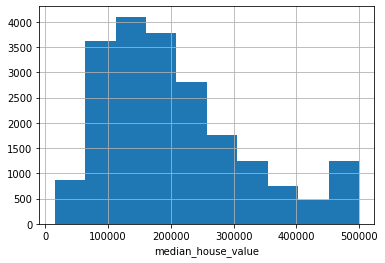

In [8]:
median_house_value.hist()
plt.xlabel('median_house_value')
plt.show()

* In the code, I plot out the histograme of median_house_value.
* I am doing so because I can check the distribution visually.
* The plot looks right skewed, and there is a rise-up at the very end of the plot.
* The rise-up may indicates outliers. These outliers could negatively influnce the validity of the prediction. Also the skewness means there are more data points for houses with comparatively lower median house value. The regression model relies more data on them, which might make the model less predictive for higher median house values.